# Merger rate density evolution with redshift

* Number of compact binary mergers per unit time per unit volume

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

# calling necessary class from ler package
from ler.gw_source_population import CBCSourceRedshiftDistribution

In [2]:
# uncomment the following line to see the docstring
# SourceGalaxyPopulationModel?

In [3]:
# class initialization
# default model "BBH popI/II Oguri2018"
cbc = CBCSourceRedshiftDistribution()

# list out the models for the merger rate density wrt redshift
print("\n available model list with it input parameters: \n", cbc.merger_rate_density_model_list)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_1.pickle
merger_rate_density interpolator will be generated at ./interpolator_pickle/merger_rate_density/merger_rate_density_5.pickle

 available model list with it input parameters: 
 {'merger_rate_density_bbh_popI_II_oguri2018': {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}, 'star_formation_rate_madau_dickinson2014': {'af': 2.7, 'bf': 5.6, 'cf': 2.9}, 'merger_rate_density_bbh_popIII_ken2022': {'n0': 1.92e-08, 'aIII': 0.66, 'bIII': 0.3, 'zIII': 11.6}, 'merger_rate_density_bbh_primordial_ken2022': {'n0': 4.4e-11, 't0': 13.786885302009708}}


### Plotting differential comoving volume

* This important to understand why the source frame merger rate decreases with redshift
* This is with planck18 cosmology. `ler` allows you to change the cosmology.
* $1/E (z)$: derivative of comoving distance with redshift, $D_c(z)$: comoving distance, $H_0$: Hubble constant, $c$: speed of light

\begin{equation}
\frac{dV_c}{dz} = 4\pi \frac{c}{H_0} \frac{(1+z)^2 D_c^2(z)}{E(z)}
\end{equation}

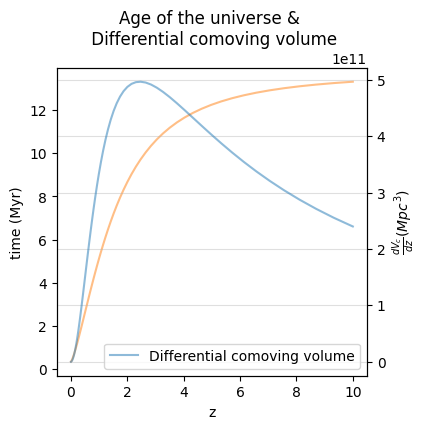

In [4]:
# age of the universe (from present day) in years wrt to redshift
# consider z=0 corresponds to present day t=0
z = np.geomspace(0.001, 10, 100)
t = 13.786885302009708-cbc.cosmo.age(z).value

# differential comoving volume wrt to redshift
z = np.geomspace(0.01, 10, 100)
dVc_dz = cbc.differential_comoving_volume(z)

# plot the differential comoving volume and age of the universe
# show differential comoving volume scale on the right y-axis
# show age of the universe scale on the left y-axis
plt.figure(figsize=(4,4))
plt.plot(z, t, color='C1', linestyle='-', alpha=0.5, label="Age of the universe")
plt.ylabel("time (Myr)")
plt.xlabel("z")
plt.twinx()
plt.plot(z, dVc_dz, color='C0', linestyle='-', alpha=0.5, label="Differential comoving volume")
plt.ylabel(r"$\frac{dV_c}{dz} (Mpc^3)$")
plt.title("Age of the universe & \n Differential comoving volume")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

### Merger rate evolution with redshift (detector frame)

* LeR default Merger rate follows [WIERDA et al. 2021](https://arxiv.org/pdf/2106.06303.pdf).
* It is a functional fit to the population I/II star merger-rate density normalized to the local merger- rate density following Oguri (2018). 
* This model follows from the M10 model to the Belczynski et al. (2017), which is arrived from Madau & Dickinson (2014) with the inclusion of the metallicity dependence of the star formation rate, which is bassically the effect related to pair-instability supernova (PSN) and  pair-instability pulsation supernova (PPSN). 

\begin{equation}
\mathcal{R}_m(z_s) = \frac{\mathcal{R}_O(b_4+1)e^{b_2 z_s}}{b_4+e^{b_3 z_s}} \text{Gpc}^{-3}\text{yr}^{-1} \tag{1}
\end{equation}
* $z_s$: redshift of source
* $\mathcal{R}$: local mergerrate. $\mathcal{R}=23.9^{+14.3}_{-8.6}\text{Gpc}^{-3}\text{yr}^{-1}=23.9^{+14.3}_{-8.6} \times 10^{-9}\text{Mpc}^{-3}\text{yr}^{-1}$
* fitting parameters: $b_2=1.6$, $b_3=2.1$, $b_4=30$

In [5]:
z_min = 0.0
z_max = 10.0
# class initialisation
cbc = CBCSourceRedshiftDistribution(z_min=z_min, 
                                  z_max=z_max,
                                  merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018",
                                  cosmology=cosmo,
                                  )

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
merger_rate_density interpolator will be generated at ./interpolator_pickle/merger_rate_density/merger_rate_density_6.pickle


In [6]:
# looking for local merger rate density (R0)
# by default, it uses results from Renske et al 2021
cbc.merger_rate_density(zs=0.0)  # in units of Mpc^-3 yr^-1

2.39e-08

#### Plots with uncertainties in local merger rate density

* [WIERDA et al. 2022](https://arxiv.org/pdf/2106.06303.pdf) , $\text{R0} = 23.9^{+14.3}_{-8.6} \times 10^{-9} Mpc^{-3} yr^{-1}$
* `ler` allows you to change input parameters for the merger rate density model
* with results from [GWTC-3, PDB (pair) model](https://arxiv.org/pdf/2111.03634.pdf):

| Model | $\mathcal{R}_O$     |
|-------|---------------------|
| BNS   | $170^{+270}_{-120}$ |
| BBH   | $25^{+10}_{-7}$     |
| NSBH  | $27^{+31}_{-17}$    |


* Note: uncertainties in local merger rate density of BNS is much larger than BBH and NSBH

### BBH

In [7]:
z = np.geomspace(0.01, 5.0, 100)

# getting the median values of zs distribution (source frame)
# det: detector frame, src: source frame
param = dict(R0=25 * 1e-9, b2=1.6, b3=2.0, b4=30)
bbh_density_median_det = cbc.merger_rate_density(z, param=param)

# getting the lower bound values of zs distribution (source frame)
param = dict(R0=(25-7) * 1e-9, b2=1.6, b3=2.0, b4=30)
bbh_density_low_det = cbc.merger_rate_density(z, param=param)

# getting the upper bound values of zs distribution (source frame)
param = dict(R0=(25+10) * 1e-9, b2=1.6, b3=2.0, b4=30)
bbh_density_up_det = cbc.merger_rate_density(z, param=param)

In [32]:
cbc = CBCSourceRedshiftDistribution(z_min=z_min, 
                                  z_max=z_max,
                                  merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018",
                                  cosmology=cosmo,
                                  merger_rate_density_param=dict(R0=25 * 1e-9, b2=1.6, b3=2.0, b4=30)
                                  )
zs_pdf = cbc.pdf_z(z)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
merger_rate_density interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_7.pickle


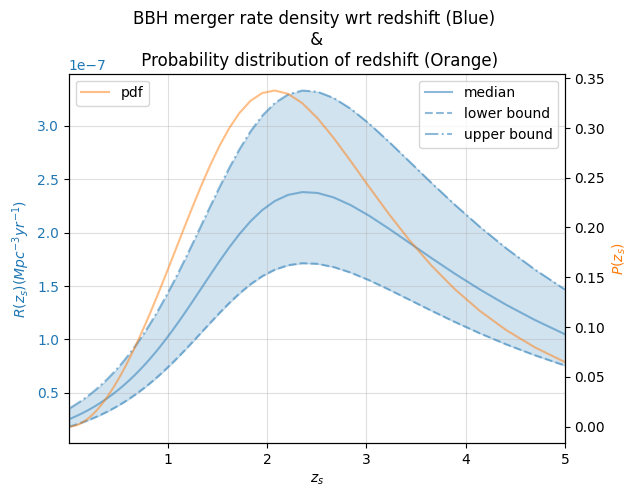

In [40]:
fig, ax1 = plt.subplots()

color = 'C0'
ax1.set_xlabel(r'$z_s$')
ax1.set_ylabel(r"$R(z_s) (Mpc^{-3} yr^{-1})$", color=color)
ax1.plot(z, bbh_density_median_det, color=color, linestyle='-', alpha=0.5, label="median")
ax1.plot(z, bbh_density_low_det, color=color, linestyle='--', alpha=0.5, label="lower bound")
ax1.plot(z, bbh_density_up_det, color=color, linestyle='-.', alpha=0.5, label="upper bound")
# ax1.plot(z, bbh_density_median_det/(1+z), color='C2', linestyle='--', alpha=0.5, label="det frame")
ax1.fill_between(z, bbh_density_low_det, bbh_density_up_det, color=color, alpha=0.2)
ax1.tick_params(axis='y', labelcolor=color)
# grid
ax1.grid(alpha=0.4)
# legend
ax1.legend(loc='upper right')
# x-range
ax1.set_xlim(0.001, 5)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'C1'
ax2.set_ylabel(r'$P(z_s)$', color=color)  # we already handled the x-label with ax1
ax2.plot(z, zs_median, color=color, linestyle='-', alpha=0.5, label="pdf")
# legend
ax2.legend(loc='upper left')

plt.title("BBH merger rate density wrt redshift (Blue) \n & \n Probability distribution of redshift (Orange)")
plt.show()

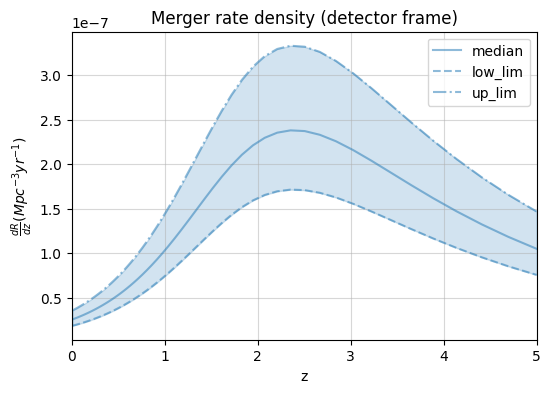

In [10]:
# fill between zs_low and zs_up

# bbh
plt.figure(figsize=(6,4))
plt.plot(z, bbh_density_median_det, color='C1', linestyle='-', alpha=0.5, label="median")
plt.plot(z, bbh_density_low_det, color='C1', linestyle='--', alpha=0.5, label="low_lim")
plt.plot(z, bbh_density_up_det, color='C1', linestyle='-.', alpha=0.5, label="up_lim")
plt.fill_between(z, bbh_density_low_det, bbh_density_up_det, color='C1', alpha=0.2)

# labels
plt.xlabel("z")
plt.ylabel(r"$\frac{dR}{dz} (Mpc^{-3} yr^{-1})$")
#plt.yscale("log")
plt.xlim(0, 5)
plt.legend() 
plt.grid(alpha=0.5)
plt.title("Merger rate density (detector frame)")
plt.show()

In [ ]:
# Create some mock data
t = z
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

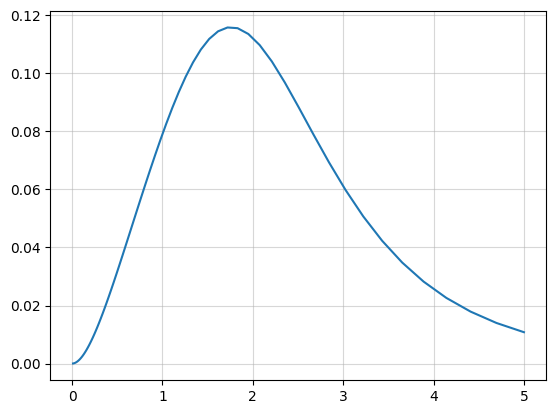

In [15]:
plt.plot(z, cbc.pdf_z(z)/(1+z))
plt.grid(alpha=0.5)


### BNS

In [12]:
z = np.geomspace(0.01, 5.0, 100)

# getting the median values of zs distribution (source frame)
# det: detector frame, src: source frame
param = dict(R0=170 * 1e-9, b2=1.6, b3=2.0, b4=30)
bns_density_median_det = cbc.merger_rate_density(z, param=param)

# getting the lower bound values of zs distribution (source frame)
param = dict(R0=(170-120) * 1e-9, b2=1.6, b3=2.0, b4=30)
bns_density_low_det = cbc.merger_rate_density(z, param=param)

# getting the upper bound values of zs distribution (source frame)
param = dict(R0=(170+270) * 1e-9, b2=1.6, b3=2.0, b4=30)
bns_density_up_det = cbc.merger_rate_density(z, param=param)

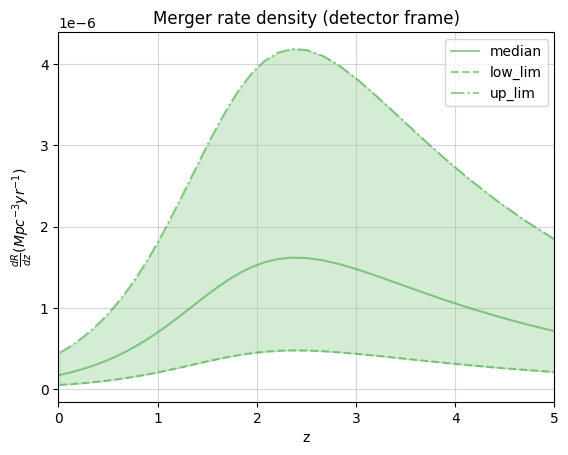

In [13]:
# fill between zs_low and zs_up

# bns
plt.plot(z, bns_density_median_det, color='C2', linestyle='-', alpha=0.5, label="median")
plt.plot(z, bns_density_low_det, color='C2', linestyle='--', alpha=0.5, label="low_lim")
plt.plot(z, bns_density_up_det, color='C2', linestyle='-.', alpha=0.5, label="up_lim")
plt.fill_between(z, bns_density_low_det, bns_density_up_det, color='C2', alpha=0.2)

# labels
plt.xlabel("z")
plt.ylabel(r"$\frac{dR}{dz} (Mpc^{-3} yr^{-1})$")
#plt.yscale("log")
plt.xlim(0, 5)
plt.legend() 
plt.grid(alpha=0.5)
plt.title("Merger rate density (detector frame)")
plt.show()

### Redshift distribution (BBH)

* The redshift distribution of the BBH merger should follow the merger rate density distribution.
* The redshift distribution (source frame) of the BBH merger is given by the merger rate density distribution multiplied by the differential comoving volume and the time dilation factor.
* It is then normalized to unity in the redshift range $z_{min}<z<z_{max}$. 

In [14]:
z_min = 0.0
z_max = 5.0
# class initialisation
cbc = CBCSourceRedshiftDistribution(z_min=z_min, 
                                  z_max=z_max,
                                  merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018")
# detector frame
rate1_det = cbc.merger_rate_density
# normalised to 1
norm1 = quad(rate1_det, z_min, z_max)[0]
rate1_det = rate1_det(z) / norm1

# source frame
rate1_src = cbc.merger_rate_density_src_frame
# normalised to 1
rate1_src = rate1_src(z) / cbc.normalization_pdf_z

z_to_luminosity_distance interpolator will be generated at ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_3.pickle
differential_comoving_volume interpolator will be generated at ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_3.pickle
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be generated at ./interpolator_pickle/merger_rate_density_bbh_popI_II_oguri2018/merger_rate_density_bbh_popI_II_oguri2018_6.pickle


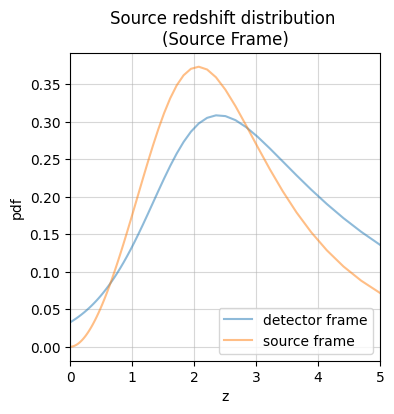

In [15]:
# plot the merger rate density
plt.figure(figsize=(4,4))
plt.plot(z, rate1_det, color='C0', linestyle='-', alpha=0.5, label="detector frame")
plt.plot(z, rate1_src, color='C1', linestyle='-', alpha=0.5, label="source frame")
plt.xlim(0, 5)
# labels
plt.xlabel("z")
plt.ylabel(r"pdf")
plt.legend()
plt.grid(alpha=0.5)
plt.title("Source redshift distribution \n(Source Frame)")
plt.show()